In [2]:
!pip install ultralytics
!pip install -U ipywidgets

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/98/44/71231f2da4fb4a602d0cef2071adb708199e571ef89ed4a136f59c19d733/ultralytics-8.0.231-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.9 MB/s eta 0:00:00
  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.9 from https://files.pythonhosted.org/packages/29/03/107d96077c4befed191f7ad1a12c7b52a8f9d2778a5836d59f9855c105f6/widgetsnbextension-4.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.9 from https://files.pythonhosted.org/packages/e8/05/0ebab152288693b5ec7b339aab857362947031143b282853b4c2dd4b5b40/jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/

In [3]:
import os
import random

from ultralytics import YOLO
import cv2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [4]:
train_images = "/kaggle/input/road-vehicle-images-dataset/trafic_data/train/images"
train_labels = "/kaggle/input/road-vehicle-images-dataset/trafic_data/train/labels"

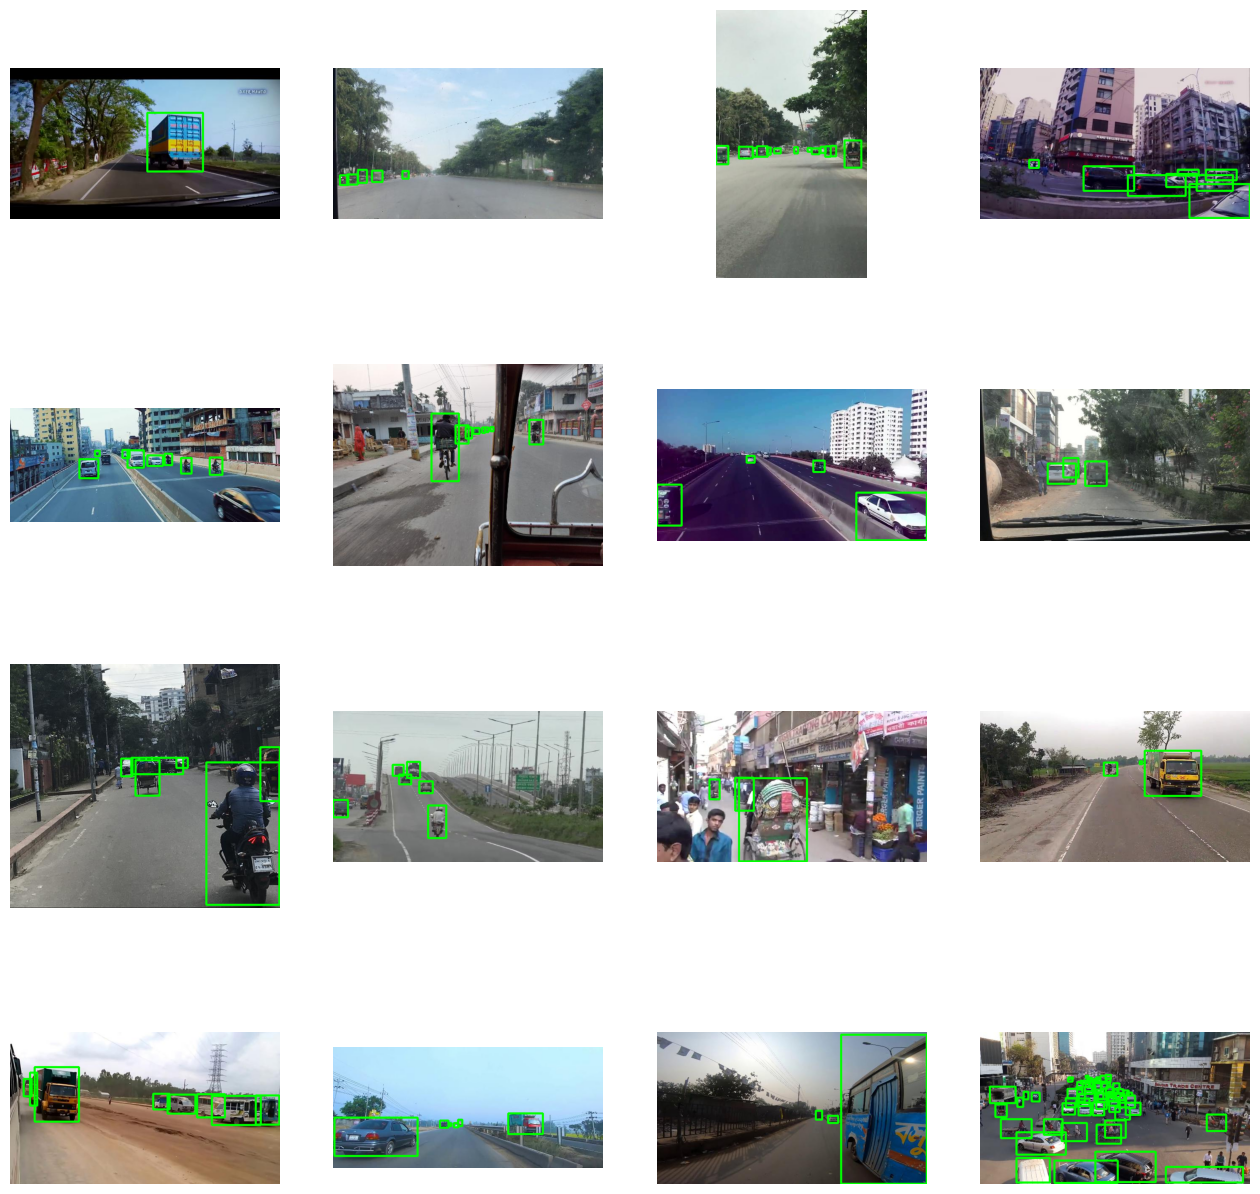

In [5]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    
    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Set paths
train_images = "/kaggle/input/road-vehicle-images-dataset/trafic_data/train/images"
train_labels = "/kaggle/input/road-vehicle-images-dataset/trafic_data/train/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()

# YOLOv8 

100%|██████████| 131M/131M [00:00<00:00, 261MB/s]



image 1/1 /kaggle/input/road-vehicle-images-dataset/trafic_data/train/images/Pias--479-_jpg.rf.454fae2d7907dc9386619c7eae79a0c2.jpg: 256x416 1 truck, 85.6ms
Speed: 6.4ms preprocess, 85.6ms inference, 42.5ms postprocess per image at shape (1, 3, 256, 416)


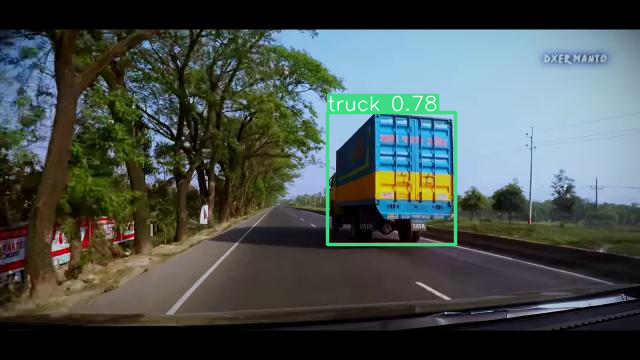

In [8]:
model = YOLO("yolov8x.pt") 

result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


0: 256x416 1 truck, 32.9ms
Speed: 1.5ms preprocess, 32.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 car, 1 truck, 32.8ms
Speed: 1.2ms preprocess, 32.8ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 416)

0: 416x256 4 cars, 3 trucks, 97.7ms
Speed: 1.2ms preprocess, 97.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 256)

0: 256x416 1 person, 14 cars, 33.5ms
Speed: 1.4ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 416)

0: 192x416 3 persons, 6 cars, 3 motorcycles, 82.1ms
Speed: 1.1ms preprocess, 82.1ms inference, 1.2ms postprocess per image at shape (1, 3, 192, 416)

0: 320x416 7 persons, 1 bicycle, 1 motorcycle, 1 bus, 80.9ms
Speed: 1.3ms preprocess, 80.9ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 416)

0: 256x416 4 cars, 1 bus, 1 truck, 32.7ms
Speed: 1.3ms preprocess, 32.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 3 persons, 3 

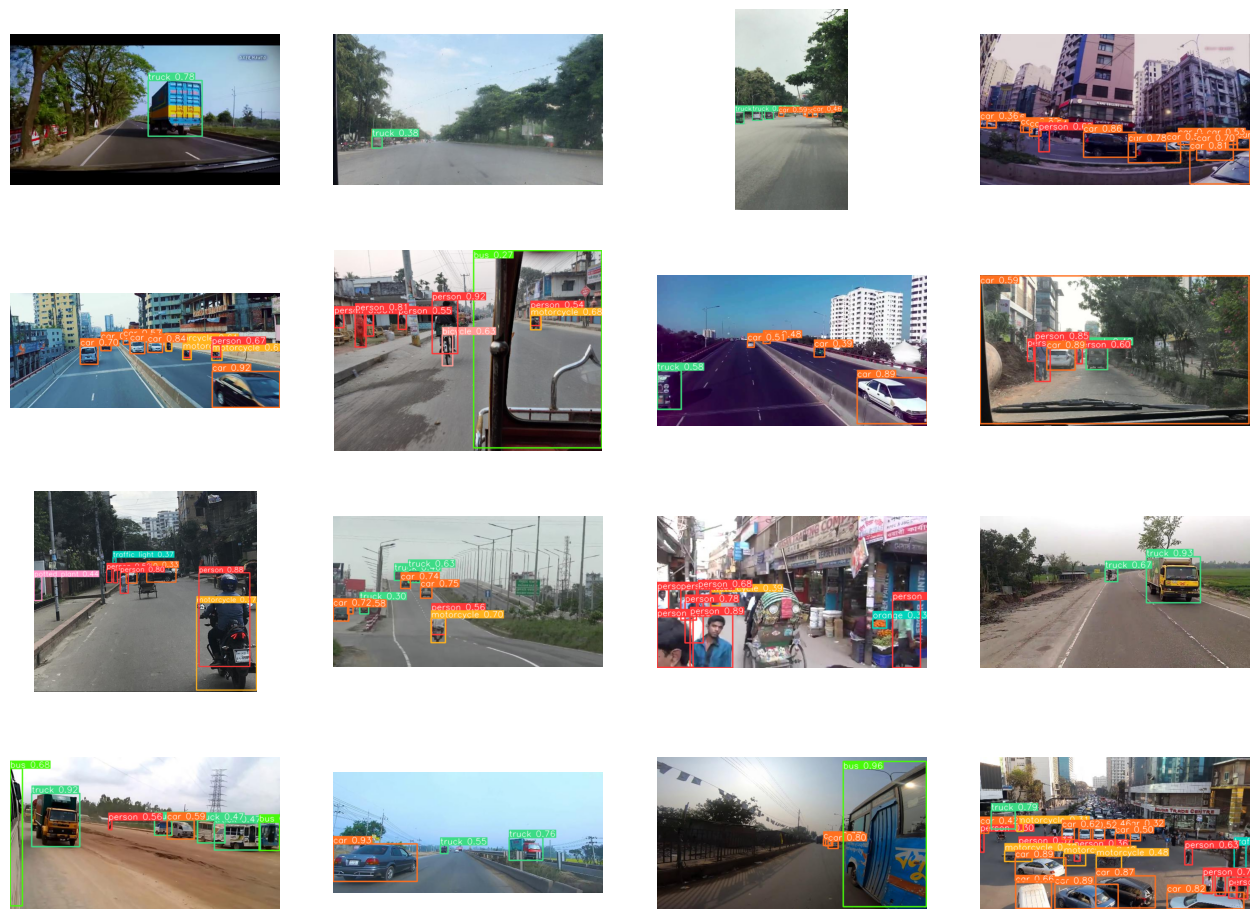

In [9]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)
    
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    
    result_predict = model.predict(image, imgsz=(416))

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

    axs[row,col].imshow(plot)
    axs[row,col].axis('off')

plt.show()

In [10]:
model = YOLO('yolov8x.pt')
model.train(data = '/kaggle/input/road-vehicle-images-dataset/trafic_data/data_1.yaml',
            epochs = 30,
            imgsz = h,
            seed = 42,
            batch = 8,
            workers = 4)


"\nmodel.train(data = '/kaggle/input/road-vehicle-images-dataset/trafic_data/data_1.yaml',\n            epochs = 30,\n            imgsz = h,\n            seed = 42,\n            batch = 8,\n            workers = 4)\n"

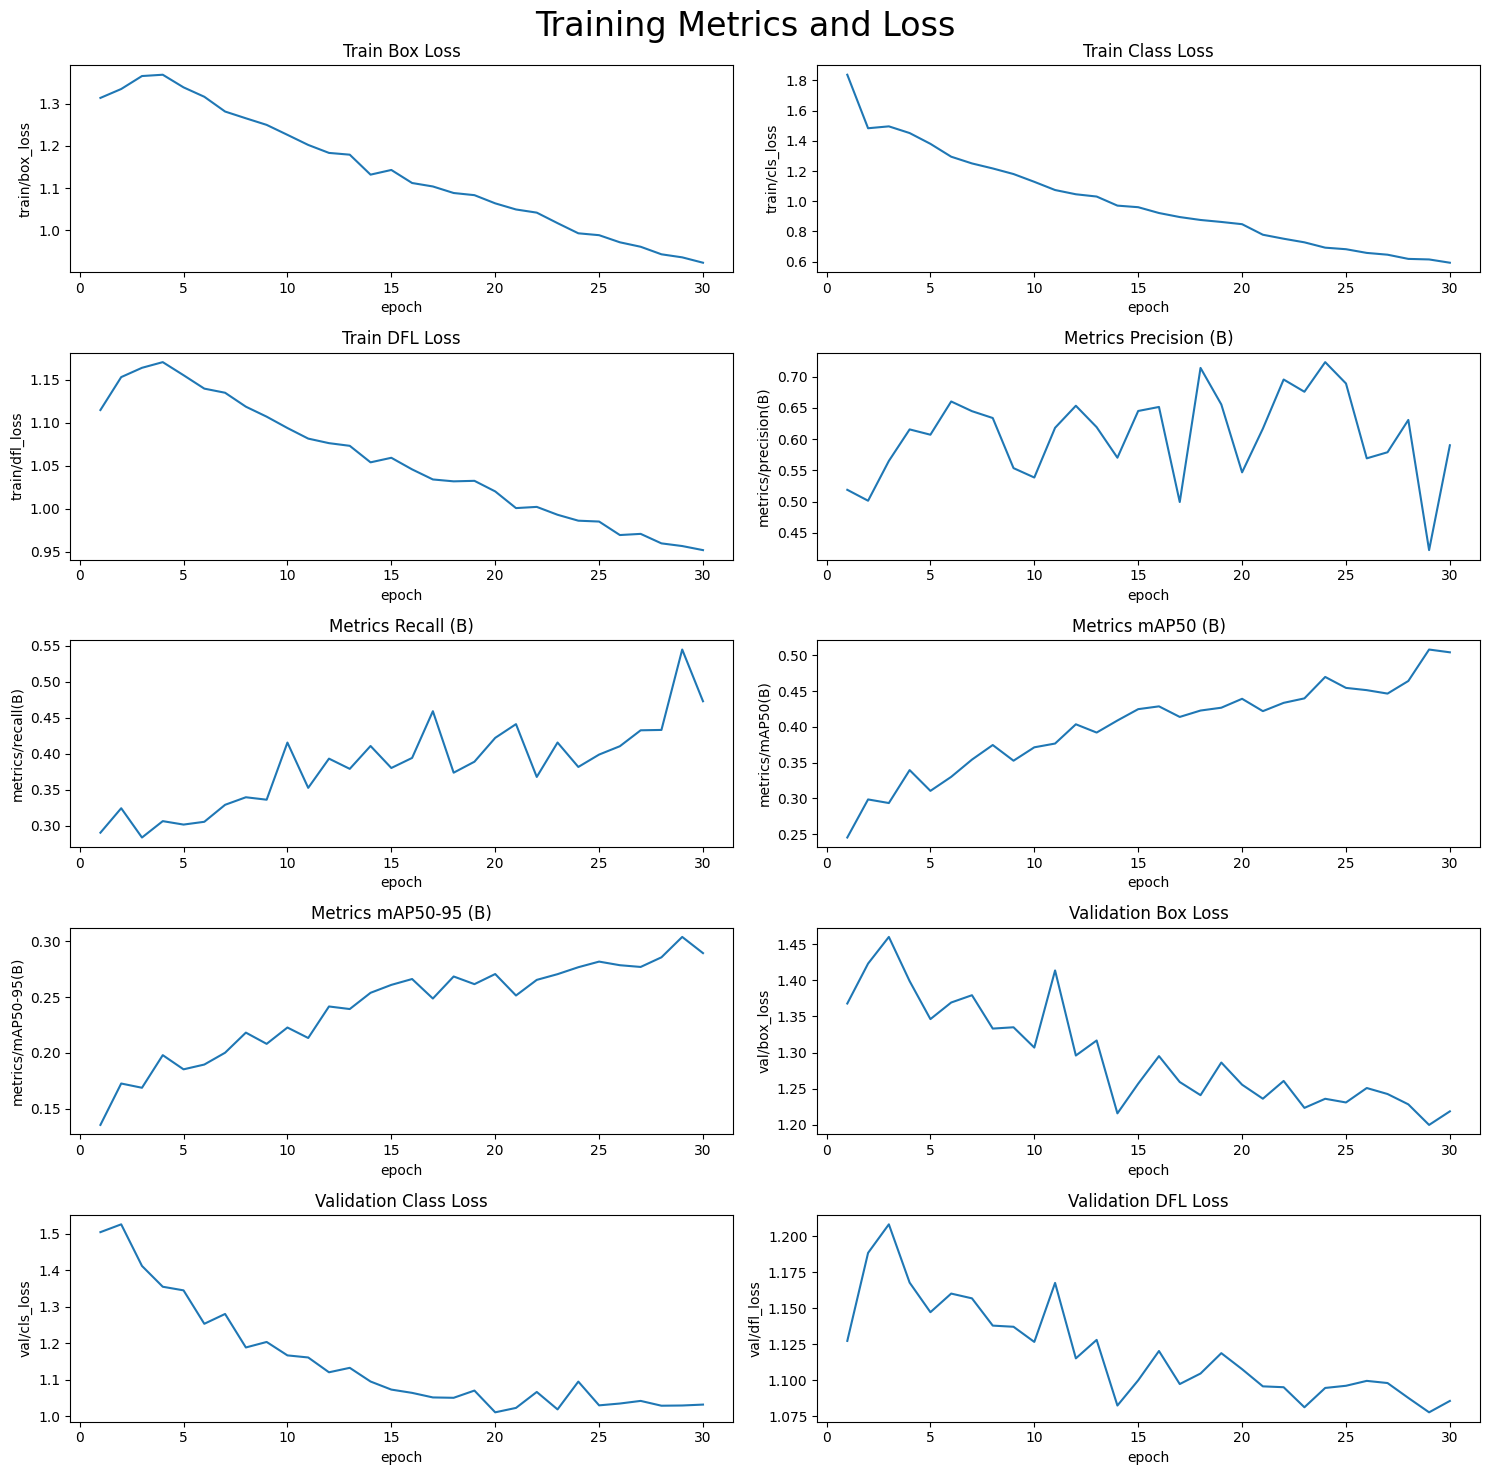

In [11]:
df = pd.read_csv('/kaggle/input/road-vehicles-files/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()